In [1]:
import json
import pandas as pd
import numpy as np
from matplotlib import image
from matplotlib import pyplot as plt
from shapely.wkt import loads
import cv2 as cv
import shapely
import os
import copy

In [2]:
# img_dir = 'D:/Architecture Jair/CORE/train/mexico/Images'
# label_dir = 'D:/Architecture Jair/CORE/train/mexico/Labels'
# buildings_dir = f'./Data/Buildings'
# no_buildings_dir = f'./Data/No_Buildings'
# split_tile_dataset(img_dir,label_dir,buildings_dir,no_buildings_dir)

In [35]:
img_dir = r"C:\Users\jairl\Documents\GitHub\CORE\Data\AE_debug\images"
label_dir = r'C:\Users\jairl\Documents\GitHub\CORE\Data\Json'
crop_size = 256
n_samples = 10

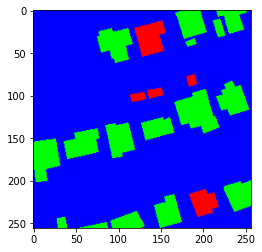

In [44]:
colours_dict = {'no-damage':[0,1,0],
           'minor-damage':[0,1,0],
           'major-damage':[1,0,0],
           'destroyed':[1,0,0]
           }

for _filename in os.listdir(img_dir):
    _filename = os.path.splitext(_filename)[0]
    if "post" in _filename:
        _label_file = open(f'{label_dir}/{_filename}.json')
        _label_data =json.load(_label_file)
        _img = image.imread(f'{img_dir}/{_filename}.png')
        _polygons = []
        out = np.zeros_like(_img)
        out[:,:,-1]=1
        for _obj in _label_data['features']['xy']:
            _polygon = loads(_obj['wkt'])
            _polygons.append(_polygon)
            _polygon = np.array(list(_polygon.exterior.coords),dtype=np.int32)
            try:
                colour = colours_dict[_obj['properties']['subtype']]
            except KeyError:
                colour = [0,0,0]
            out = cv.fillPoly(out,[_polygon],colour)

        for n in range(n_samples):
            x = np.random.randint(0,_img.shape[0]-crop_size) + np.array([0,crop_size])
            y = np.random.randint(0,_img.shape[1]-crop_size) + np.array([0,crop_size])
            sample = _img[x[0]:x[1],y[0]:y[1]] 
            mask = out[x[0]:x[1],y[0]:y[1]]
            plt.imshow(mask)
            # if np.sum(mask[:,:,0]) > 0:
            #     image.imsave(f"C:/Users/Admin/Documents/studentassistent-privé/Jair/CORE/AE_Training/mask/{_filename}_{n}.jpeg", mask)
            #     image.imsave(f"C:/Users/Admin/Documents/studentassistent-privé/Jair/CORE/AE_Training/sample/{_filename}_{n}.jpeg", sample)
            # else:
            #     if np.random.randint(0,100) < 1: 
            #         image.imsave(f"C:/Users/Admin/Documents/studentassistent-privé/Jair/CORE/AE_Training/mask/{_filename}_{n}.jpeg", mask)
            #         image.imsave(f"C:/Users/Admin/Documents/studentassistent-privé/Jair/CORE/AE_Training/sample/{_filename}_{n}.jpeg", sample)
            # fig, axs = plt.subplots(2)
            # fig.set_figheight(15)
            # fig.set_figwidth(15)
            # axs[0].imshow(sample)
            # axs[1].imshow(mask)

In [45]:
img = image.imread('./Data/Images/mexico-earthquake_00000000_post_disaster.png')
label_file = open('./Data/Json/mexico-earthquake_00000000_post_disaster.json')
label_data =json.load(label_file)
colours_dict = {'no-damage':[0,0,1],
           'minor-damage':[0,0,1],
           'major-damage':[1,0,1],
           'destroyed':[1,0,1]
           }
polygons = []
damage_state = []

colours = []
out = copy.deepcopy(img)
for _obj in label_data['features']['xy']:
    _polygon = loads(_obj['wkt'])
    polygons.append(_polygon)
    _polygon = np.array(list(_polygon.exterior.coords),dtype=np.int32)
    colour = colours_dict[_obj['properties']['subtype']]
    out = cv.polylines(out,[_polygon],True,colour,5)
plt.imshow(out)

FileNotFoundError: [Errno 2] No such file or directory: './Data/Images/mexico-earthquake_00000000_post_disaster.png'